# Obtaining structured web content and programmatic access

In this notebook we will learn how to make use of readily structured data through dedicated application programming interfaces (APIs), how to authenticate and how to properly design requests (also called "payload") in order to retrieve large datasets.

**Advantages** of APIs are that
- access is legal and in most cases clearly and transparently regulated (e.g. 10,000 calls per day)
- structuring through `requests` and `BeautifulSoup` not required
- Python packages that simplify server-client interaction are available

**Disadvantages** of APIs are that
- we have to learn how APIs work and how we should interact with them (each API has some peculiarities and documentation is usually good, but sometimes not so...)
- authentification may be required and access may not be free of charge 

We will
- obtain data of a public statistical office such as the IMF or World Bank through the `pandas-datareader`
- directly obtain a (ranking) table from a website such the [World Cube Association](https://www.worldcubeassociation.org/results/rankings/333/single)
- learn how to use the Destatis/GENESIS Online service and API
- learn how to use the Twitter API (in particular [Tweepy](https://www.tweepy.org/), a Python library for the Twitter API) and retrieve Tweets with GeoTags (i.e. coordinates) subject to specified geography and search terms
- conduct some small analyses and visualise the results appropriately

In [1]:
import pandas as pd

In [2]:
!pip install pandas-datareader --upgrade

In [2]:
from pandas_datareader import wb # imports world bank access
search = wb.search('GDP.*current.*US') # search for keyword
search

,id,name,unit,source,sourceNote,sourceOrganization,topics
9027,NV.SRV.DISC.CD,"Discrepancy in GDP, value added (current US$)",,Africa Development Indicators,This is the discrepancy included in the value ...,"b'World Bank national accounts data, and OECD ...",
9155,NY.GDP.DISC.CD,Discrepancy in expenditure estimate of GDP (cu...,,Africa Development Indicators,This is the discrepancy included in the ‘total...,"b'World Bank national accounts data, and OECD ...",
9166,NY.GDP.MKTP.CD,GDP (current US$),,World Development Indicators,GDP at purchaser's prices is the sum of gross ...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9185,NY.GDP.PCAP.CD,GDP per capita (current US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9292,NYGDPMKTPSACD,"GDP,current US$,millions,seas. adj.,",,Global Economic Monitor,,b'',


In [3]:
df = wb.download(indicator = 'NY.GDP.MKTP.CD', country = ['DE', 'FR', 'IT'],
                start = 2000, end = 2019)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, ('Germany', '2019') to ('Italy', '2000')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.MKTP.CD  60 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [4]:
df.groupby('country').describe()

NY.GDP.MKTP.CD                                            \
                 count          mean           std           min   
country                                                            
France            20.0  2.391444e+12  5.039285e+11  1.362249e+12   
Germany           20.0  3.213212e+12  6.554315e+11  1.943145e+12   
Italy             20.0  1.907346e+12  3.611625e+11  1.143830e+12   

                                                                 
                  25%           50%           75%           max  
country                                                          
France   2.176030e+12  2.618880e+12  2.733605e+12  2.918383e+12  
Germany  2.836649e+12  3.409510e+12  3.730707e+12  3.963768e+12  
Italy    1.827731e+12  1.982686e+12  2.145770e+12  2.398857e+12

In [9]:
df2 = df.reset_index()
df2.head()

,country,year,NY.GDP.MKTP.CD
0,Germany,2019,3.861124e+12
1,Germany,2018,3.963768e+12
2,Germany,2017,3.682602e+12
3,Germany,2016,3.467498e+12
4,Germany,2015,3.356236e+12


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         60 non-null     object 
 1   year            60 non-null     object 
 2   NY.GDP.MKTP.CD  60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [11]:
df2.columns = ['country', 'year', 'gdp'] # rename columns
df2.year = df2.year.astype(int) # numeric annual indicator
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  60 non-null     object 
 1   year     60 non-null     int32  
 2   gdp      60 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ KB


In [12]:
import matplotlib.pyplot as plt
import datetime
# plt.rcParams["figure.figsize"] = [16,9]

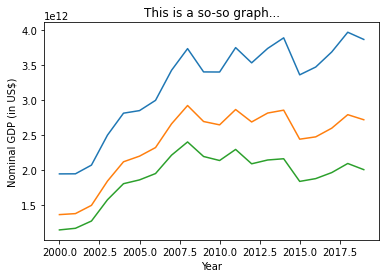

In [13]:
for country in df2['country'].unique():
    
    plt.plot(df2[df2['country'] == country]['year'], df2[df2['country'] == country]['gdp'], label = country)
    
    plt.xlabel('Year')
    plt.ylabel('Nominal GDP (in US$)')
    plt.title('This is a so-so graph...')

In [14]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
# set(df2['country'])

In [16]:
traces = []

for country in df2['country'].unique():
    
    trace = go.Scatter(name = country, x = df2[df2['country'] == country]['year'],
                      y = df2[df2['country'] == country]['gdp'])
    
    traces.append(trace)
    
fig = go.Figure(data = traces)

fig.layout.update(title=go.layout.Title(

    text = 'This is a much cooler graph!'

))

fig.layout.update(yaxis= go.layout.YAxis(title=go.layout.yaxis.Title(
                        text='Nominal GDP (in US$)')));

fig.layout.update(xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'Year'), rangeslider = dict(visible = True)));

iplot(fig, filename = 'Nominal_GDP')

## Directly parsing `table` objects from HTML

In [ ]:
ranking = pd.read_html('https://www.worldcubeassociation.org/results/rankings/333/single', encoding='utf-8')

In [ ]:
ranking[0].head()

Which nationality appears most frequently in the World Cube Association's ranking?

In [ ]:
ranking[0].groupby('Citizen of').count()

Which nationality needed, on average, the **lowest** amount of time to solve a 3x3x3 cube? Sort the output in ascending order.

In [ ]:
ranking[0].groupby('Citizen of').mean()['Result'].sort_values(ascending = True)

How many possible states/permutations, starting from the solved state, can a 3x3x3 Rubik's cube have? 

Hints:
1. The centre squares are fixed (a plane rotation around these squares doesn't change the cube's state)
2. There are eight corner pieces (with three colors on the side) and twelve edge pieces (with two colors on the side) which all revolve around the centre pieces
3. There are six different colors
4. We only look at "legal" states, i.e. those that can only be realised without assembling the cube (and therefore not violating Hint 1)

In [ ]:
import math

answer = (math.factorial(8) * 3**8) * 1/3 * (math.factorial(12) * 2**12) * 1/2 * 1/2

# [(corner pieces) * fraction of admissible corner combinations (clock-wise and anti-clockwise twists cancel each other out, 
# hence 3**7 / 3**8 = 1/3)] 
# * [(edge pieces) * fraction of admissible edge combinations (clock-wise and anti-clockwise twists cancel each other out, 
# hence 2**11 / 2**12 = 1/2)]
# * [1/2 (only half of the corner and edge states can be reached as corner and edge states must both coincide in the number
# i.e. even or odd of turns taken to reach either position)]

print(str(answer) + " or about 43.2 quintillion combinations!")

Which result entry in the World Ranking table is the most recent one? Which one is the oldest one? Be as precise as possible! (Hint: You may have to combine your knowledge from scraping HTML files.)

Compute the expected value of `Result` conditional on `Nationality = 'Germany'`. Are the German contestants statistically significantly faster/slower in solving the cube than other contestants, based on `Nationality`? Does statistical significance change if you use robust standard errors?

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
df = ranking[0]
df['Non_German_Dummy'] = 1

In [ ]:
non_german_index = df[df['Citizen of'] != 'Germany'].index

In [ ]:
german_index = [x for x in df.index if x not in non_german_index]

In [ ]:
dummy_values = [0 if y in german_index else 1 for y in df.index]

In [ ]:
X = dummy_values
Y = df['Result']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

In [ ]:
model.get_robustcov_results(cov_type='HC1').summary()

## Spatial libraries

The installation procedure of spatial libraries for Python (on Windows) can be quite tedious but [this answer](https://stackoverflow.com/questions/51095970/install-python-geopandas-failed/51560940#51560940) on Stackoverflow (make sure to upvote ;)) and [this detailed instruction](https://geoffboeing.com/2014/09/using-geopandas-windows/) make it straight forward. You can also find the required wheels for Python 3.8 and 64-bit for offline `pip install` in this notebook's [repository](https://github.com/gerwolf/webscraping-workshop/tree/main/DataFrames%20and%20APIs). After this, you can simply `pip install geopandas`.

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.plot()

In [ ]:
world.head()

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/gerwolf/81ebb170eb25d4a13f2695db4520f90e/raw/7c24eb4a2b11f6d4c7ac38bdf3555dfc7da6823e/GDPpc_PPP.csv", sep = ";")
df['Country'] = df['Country'].str.replace('�',' ')
df['Country'] = df['Country'].str.replace('United States','United States of America')

In [ ]:
df[df['Country'] == 'United States of America']

In [ ]:
final_geodf = df.merge(world, left_on='Country', right_on = 'name', how = 'left').dropna()

In [ ]:
final_geodf['GDPpc_PPP'] = final_geodf['GDPpc_PPP'].str.replace(',','')

In [ ]:
fig = go.Figure(data=[go.Choropleth(
    locations=final_geodf['iso_a3'], # Spatial coordinates
    z = final_geodf['GDPpc_PPP'].astype(float), # Data to be color-coded
#     locationmode = 'world', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text=final_geodf['Country']
#     colorbar_title = "Millions USD",
)])

fig.layout.update(
    title_text = 'GDP per capita (2018, IMF)',
    geo_scope='world', # limite map scope to USA
);

iplot(fig, filename ="geomap")

In [ ]:
fig = go.Figure(data=[go.Choropleth(
    locations=final_geodf[final_geodf['continent'] == 'Europe']['iso_a3'], # Spatial coordinates
    z = final_geodf[final_geodf['continent'] == 'Europe']['GDPpc_PPP'].astype(float), # Data to be color-coded
#     locationmode = 'world', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text=final_geodf[final_geodf['continent'] == 'Europe']['Country']
#     colorbar_title = "Millions USD",
)])

fig.layout.update(
    title_text = 'GDP per capita (2018, IMF)',
    geo_scope='europe', # limite map scope to USA
);

iplot(fig, filename ="geomap")

## Destatis/GENESIS Online
The GENESIS API is the web interface service by the Federal Statistical Office of Germany and is a good place to start learning how to interact programmatically with a server.

There is a [comprehensive description/introduction](https://www-genesis.destatis.de/genesis/misc/GENESIS-Webservices_Einfuehrung.pdf) on the service, unfortunately in German only. To display the PDF inside Jupyter Notebook in Chrome you may have to enable the [PDF Viewer extension](https://chrome.google.com/webstore/detail/pdf-viewer/oemmndcbldboiebfnladdacbdfmadadm?utm_source=chrome-ntp-icon).

In [17]:
from IPython.display import IFrame, display
filepath = "https://www-genesis.destatis.de/genesis/misc/GENESIS-Webservices_Einfuehrung.pdf"
IFrame(filepath, width=980, height=800)

Read about the `whoami` method (in Section 2.2). Do you have to authenticate? What does it return? How would you send a `request`?

In [ ]:
import genesis_config
import requests

In [ ]:
url = "https://www-genesis.destatis.de/genesisWS/rest/2020/helloworld/whoami"
response = requests.get(url)
response.text

Read about the `logincheck` method (in Section 2.2). Do you have to authenticate? What does it return? Construct a request object using string formatting, send a `request` (in English language) and print the request's status. What type is the response's `text` attribute?

In [ ]:
url = 'https://www-genesis.destatis.de/genesisWS/rest/2020/helloworld/logincheck?username={}&password={}&language={}'.format(genesis_config.Username, genesis_config.Password, 'en')
response = requests.get(url)

In [ ]:
print(response.text)

Now that we have a working connection to the GENESIS Online API we want to directly obtain an economic indicator, the private sector's savings rate on a quarterly basis, for instance. This `data` is usually stored in a `table` somewhere in the depths of a data warehouse and it is (unfortunately) necessary to familiarise yourself, at least partially, with the internal server's structure.
1. In the documentation file search for the `tablefile` method (under Section 2.5 Data). When should it be used? What does it return?
2. Which method should you use if you want to directly obtain a `chart`?
3. Which method should you use if you want to directly obtain a regional `map`? Which parameter controls the image's resolution?

In [ ]:
field = '12411-0010'
stand = '31.12.2019'
language = 'en'
url = 'https://www-genesis.destatis.de/genesisWS/rest/2020/data/map2table?username={}&password={}&name={}&area=all&mapType=0&classes=5&classification=0&zoom=3&startyear=&endyear=&timeslices=&regionalvariable=&regionalkey=&classifyingvariable1=&classifyingkey1=&classifyingvariable2=&classifyingkey2=&classifyingvariable3=&classifyingkey3=&format=png&stand={}&language={}'.format(genesis_config.Username, genesis_config.Password, field, stand, language)
response = requests.get(url)

In [ ]:
with open("map.png", 'wb') as f:
    f.write(response.content)

In [ ]:
from IPython.display import Image
Image(filename='map.png') 

4. Login to the [GENESIS Online user interface](https://www-genesis.destatis.de/genesis/online?Menu=Anmeldung#abreadcrumb). Familiarise yourself with the tables' structure and navigate to the National Accounts (at the central level) --> Private sector disposable income and savings at quarterly frequency. Which parameters in the request can you control?
5. Which method would you choose if you want to directly obtain a `table` in some machine readable format, e.g. a `.csv` or `.xlsx` that you can read into `pandas`? How do you include additional conditions matching particular values?
6. Construct a `request` which contains the following specification:
    - only seasonally and calendar-adjusted values (X13)
    - all available years and quarters
    - output format should be a `.xlsx` file
7. Send the request but directly through the `pandas.read_excel()` method.

In [ ]:
! pip install openpyxl

In [ ]:
code = '81000-0010'
key_1 = 'WERT04'
val_1 = 'X13JDKSB'
key_2 = ''
val_2 = ''
key_3 = ''
val_3 = ''
start_year = '1991'
end_year = '2020'

url = ('https://www-genesis.destatis.de/genesisWS/rest/2020/data/tablefile?username={}&password={}&name={}&area=DINSG*&compress=false&transpose=false&startyear={}&endyear={}&timeslices=&regionalvariable=&regionalkey=&classifyingvariable1={}&classifyingkey1={}&classifyingvariable2={}&classifyingkey2={}&classifyingvariable3={}&classifyingkey3={}&format=xlsx&job=false&stand=&language=de').format(genesis_config.Username, genesis_config.Password, code, start_year, end_year, key_1, val_1, key_2, val_2, key_3, val_3)
df = pd.read_excel(url)

In [ ]:
df

In [3]:
import numpy as np

In [ ]:
df = df.iloc[[2,3,37], :].T.iloc[2:,:]
df.columns = ['Year', 'Quarter', 'Rate']
df.reset_index(inplace = True, drop = True)
df['Year'] = df['Year'].fillna(method='ffill')
df['Quarter_str'] = df['Quarter'].copy()
df['Quarter'] = df['Quarter'].replace('1. Quartal', 'Q1')
df['Quarter'] = df['Quarter'].replace('2. Quartal', 'Q2')
df['Quarter'] = df['Quarter'].replace('3. Quartal', 'Q3')
df['Quarter'] = df['Quarter'].replace('4. Quartal', 'Q4')
df['Rate'] = df['Rate'].replace ('...', np.NaN)
qs = df['Year'] + '-' + df['Quarter']
df['Date'] = pd.PeriodIndex(qs.values, freq='Q').to_timestamp()
df.set_index(df['Date'], inplace = True, drop = True)
del df['Date']
df.dropna(inplace=True)
df['col_name'] = df['Quarter'] + ' ' + df['Year'].str[2:4]
col_names = list(df['col_name'].values)
df = df.T
df.columns = col_names
df = df.T

In [ ]:
df.head()

In [ ]:
fig = go.Figure(data=[
    
    go.Scatter(name='Private sector savings rate', x = list(df.index),
    y = list(df['Rate']))
    
])

fig.layout.update(title = go.layout.Title(
                        text='Private sector savings rate (Germany)'))

fig.layout.update(yaxis= go.layout.YAxis(title=go.layout.yaxis.Title(
                        text='in % of disposable income')))

fig.layout.update(xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'Quarter-Year'), rangeslider = dict(visible = True)));

iplot(fig, filename = 'savings_rate')

## Twitter API


In [ ]:
!pip install python-twitter --upgrade

Note there are [rate limits](https://developer.twitter.com/en/docs/twitter-api/rate-limits)!

In [28]:
import twitter
import twitter_config

api = twitter.Api(consumer_key = twitter_config.api_key ,
                  consumer_secret = twitter_config.api_secret_key,
                  access_token_key = twitter_config.access_token,
                  access_token_secret = twitter_config.access_token_secret,
                  tweet_mode = 'extended',
                  sleep_on_rate_limit = True)

In [19]:
got = api.GetSearch('#gameofthrones',
                       count = 10) 

In [24]:
example_tweet = got[0]
type(example_tweet)

twitter.models.Status

In [ ]:
print('id:', example_tweet.id)
print('Text:', example_tweet.full_text) # key 'text' wenn tweet_mode != 'extended'
print('Hashtags:', example_tweet.hashtags)
print('Media:', example_tweet.media)
print('Date:', example_tweet.created_at)
print('Language:', example_tweet.lang)
print('Retweets:', example_tweet.retweet_count)

In [ ]:
!pip install tweepy --upgrade

In [29]:
import tweepy
import json

In [30]:
auth = tweepy.OAuthHandler(twitter_config.api_key, twitter_config.api_secret_key)
auth.set_access_token(twitter_config.access_token, twitter_config.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [31]:
tweepy.__version__

'3.10.0'

In [32]:
# searchTerms = "#maskenaffaere"
noOfSearch = 200
searchCountry = "Germany"
places = api.geo_search(query=searchCountry, granularity="country")
place_id = places[0].id

In [33]:
place_id

'fdcd221ac44fa326'

In [34]:
max_id = None
for j in range(50):
    
    header = {
        # "q": f'{searchTerms} place:{place_id}'.format(searchTerms, place_id) and ("place:%s" % place_id),
        # "q": "#maskenaffaere -filter:locations",
        # "q": "#maskenaffaere filter:geo_enabled",
        # "q": "#maskenaffaere",
        # "geocode": '51.590556,10.106111,310mi',
        "q": "place:fdcd221ac44fa326",
        "lang": "de",
        "tweet_mode": "extended",
        "count": 100,
        "max_id": max_id
        # "search_term": ""
    }
    
    try:
    
        batch_tweets = tweepy.Cursor(api.search, **header).items(noOfSearch)
        # the double asterisks ** inside of the function means that an abritrary number of arguments
        # can be taken by the function in form as a dictionary (* would be a tuple)
        
    except Exception as error:
        
        break
        
    batch_tweets = [i._json for i in batch_tweets]
    batch_ids = [i["id"] for i in batch_tweets]
    with open(f'{j}_de_bunch.json', 'w', encoding='utf-8') as f:
        json.dump(batch_tweets, f, ensure_ascii=False)
    max_id = batch_ids[-1]

In [1]:
import json

bunches = []

for bunch in range(50):
    
    with open('./Twitter Bunches (Thursday)/' + str(bunch) + '_de_bunch.json', 'r', encoding='utf-8') as f:
    
        D_read = json.load(f)
        bunches.extend(D_read) # extend instead of append

In [2]:
len(bunches)

10000

In [3]:
from shapely.geometry import Point, Polygon

In [4]:
import numpy as np

tweet_ids = []

for tweet in bunches:
    
    tweet_ids.append(tweet['id'])
    
len(np.unique(np.array(tweet_ids))), len(bunches)

(9951, 10000)

In [5]:
unique = { tweet['id'] : tweet for tweet in bunches } # a dictionary comprehension, dicts do not allow duplicate keys

In [6]:
len(unique)

9951

In [7]:
matches = []

for (key, value) in unique.items():
    
    newDict = dict()
    
    try:
        
        if value['place']['bounding_box']['coordinates'] != None:
            
            newDict[key] = value
            
            matches.append(newDict)
    except:
        
        None

In [8]:
matches[0]

{1382787792535703552: {'created_at': 'Thu Apr 15 20:07:55 +0000 2021',
  'id': 1382787792535703552,
  'id_str': '1382787792535703552',
  'full_text': '@bennai_m @JoueursDZ @DZfoot Ya sehr gut geschossen Grosse Verantwortung',
  'truncated': False,
  'display_text_range': [29, 72],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'bennai_m',
     'name': 'MBennai',
     'id': 1157689821969756161,
     'id_str': '1157689821969756161',
     'indices': [0, 9]},
    {'screen_name': 'JoueursDZ',
     'name': 'JDZ Football',
     'id': 1177267711157690371,
     'id_str': '1177267711157690371',
     'indices': [10, 20]},
    {'screen_name': 'DZfoot',
     'name': 'DZfoot',
     'id': 296303972,
     'id_str': '296303972',
     'indices': [21, 28]}],
   'urls': []},
  'metadata': {'iso_language_code': 'de', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': 

In [10]:
import pandas as pd

results_list = []

for i in matches:
    
    empty_dict = {}
    
    empty_dict['Tweet ID'] = list(i.keys())[0]
    
    values_list = list(i.values())[0]
    
    empty_dict['Created at'] = pd.to_datetime(values_list['created_at'])
    empty_dict['Full Text'] = values_list['full_text']
    empty_dict['User Name'] = values_list['user']['name']
    empty_dict['User Alias'] = values_list['user']['screen_name']
    empty_dict['Place ID'] = values_list['place']['id']
    empty_dict['Place Name'] = values_list['place']['name']
    empty_dict['Country Code'] = values_list['place']['country_code']
    empty_dict['Country Name'] = values_list['place']['country']
    empty_dict['Bounding Box'] = values_list['place']['bounding_box']['coordinates'][0]
    
    
    bbox = Polygon(values_list['place']['bounding_box']['coordinates'][0])
    
    latitude = bbox.centroid.xy[1][0]
    longitude = bbox.centroid.xy[0][0]
    
    coord = Point(longitude, latitude)
    
    empty_dict['Tweet Coordinates'] = coord
    empty_dict['Retweet Count'] = values_list['retweet_count']
    empty_dict['Favorite Count'] = values_list['favorite_count']
     
    empty_dict['User Location'] = values_list['user']['location']
    empty_dict['User Followers'] = values_list['user']['followers_count']
    empty_dict['User Friends'] = values_list['user']['friends_count']
    empty_dict['Registration Date'] = values_list['user']['created_at']
    
    tweet_url = 'https://twitter.com/{}/status/{}'.format(values_list['user']['screen_name'], values_list['id'])
    empty_dict['Tweet URL'] = tweet_url
    
    results_list.append(empty_dict)

In [11]:
results_list[0]

{'Tweet ID': 1382787792535703552,
 'Created at': Timestamp('2021-04-15 20:07:55+0000', tz='UTC'),
 'Full Text': '@bennai_m @JoueursDZ @DZfoot Ya sehr gut geschossen Grosse Verantwortung',
 'User Name': 'Tassilli Hoggar',
 'User Alias': 'TassilliHoggar',
 'Place ID': '5bcd72da50f0ee77',
 'Place Name': 'Hamburg',
 'Country Code': 'DE',
 'Country Name': 'Germany',
 'Bounding Box': [[8.4201604, 53.395118],
  [10.325199, 53.395118],
  [10.325199, 53.9646546],
  [8.4201604, 53.9646546]],
 'Tweet Coordinates': <shapely.geometry.point.Point at 0x293e9dde160>,
 'Retweet Count': 0,
 'Favorite Count': 0,
 'User Location': '',
 'User Followers': 17,
 'User Friends': 113,
 'Registration Date': 'Sat Mar 13 18:15:23 +0000 2021',
 'Tweet URL': 'https://twitter.com/TassilliHoggar/status/1382787792535703552'}

In [12]:
results_df = pd.DataFrame(results_list)

In [13]:
results_df

,Tweet ID,Created at,Full Text,User Name,User Alias,Place ID,Place Name,Country Code,Country Name,Bounding Box,Tweet Coordinates,Retweet Count,Favorite Count,User Location,User Followers,User Friends,Registration Date,Tweet URL
0,1382787792535703552,2021-04-15 20:07:55+00:00,@bennai_m @JoueursDZ @DZfoot Ya sehr gut gesch...,Tassilli Hoggar,TassilliHoggar,5bcd72da50f0ee77,Hamburg,DE,Germany,"[[8.4201604, 53.395118], [10.325199, 53.395118...",POINT (9.372679700000001 53.67988630000001),0,0,,17,113,Sat Mar 13 18:15:23 +0000 2021,https://twitter.com/TassilliHoggar/status/1382...
1,1382787792288296960,2021-04-15 20:07:55+00:00,Tolles Tor. Jetzt wird #Ajax Oberwasser bekomm...,💉Volker💉 der mit der Erstimpfung,Souldoc666,e4758621dad011b5,Homburg,DE,Germany,"[[7.273758, 49.247431], [7.404843, 49.247431],...",POINT (7.3393005 49.31679099999999),0,0,"Homburg, Deutschland",298,338,Thu Sep 17 09:11:28 +0000 2009,https://twitter.com/Souldoc666/status/13827877...
2,1382787753679675392,2021-04-15 20:07:46+00:00,Die Roma wie eine alte Oma. #romaja,Körner Borussen Oppa,19Micha09,b4fadeb3a3a29e2f,Dortmund,DE,Germany,"[[7.302443, 51.415504], [7.638168, 51.415504],...",POINT (7.4703055 51.5077235),0,0,"Dortmund, Deutschland",2708,840,Fri Jan 06 16:54:18 +0000 2012,https://twitter.com/19Micha09/status/138278775...
3,1382787731751854082,2021-04-15 20:07:40+00:00,@livekeepgoing Wie Dresden letzte Saison bei d...,Felix E.Czosnowski,czossi,8b5c39218ec8bdee,Aachen,DE,Germany,"[[5.9748467, 50.6621438], [6.218106, 50.662143...",POINT (6.09647635 50.75968675),0,0,Berlin/Aachen Germany,1312,1639,Wed Aug 26 16:02:38 +0000 2009,https://twitter.com/czossi/status/138278773175...
4,1382787701607428101,2021-04-15 20:07:33+00:00,Das sind nich die Freunde mit denen man schrei...,Flauschbaerlauch,IchFeudelNurRum,02200c9f3030f4db,Gera,DE,Germany,"[[11.997519, 50.799066], [12.169188, 50.799066...",POINT (12.0833535 50.88786450000001),0,0,,152,181,Fri Jan 31 23:54:42 +0000 2020,https://twitter.com/IchFeudelNurRum/status/138...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,1382436363644108813,2021-04-14 20:51:28+00:00,@Voland10557 alles richtig gemacht ;-) https:/...,Recumbent Travelling,RecumbentTravel,0fc8d7e6ff19d6b1,Alt-Hohenschönhausen,DE,Germany,"[[13.4658154, 52.533217], [13.531713, 52.53321...",POINT (13.4987642 52.548652),0,3,Unterwegs,701,105,Fri Jan 31 14:09:22 +0000 2014,https://twitter.com/RecumbentTravel/status/138...
9947,1382436336280473603,2021-04-14 20:51:21+00:00,@Come_backtogod Größe Gottes in der Schöpfung\...,ConsoelaM,ConsoelaM,37439688c6302728,Munich,DE,Germany,"[[11.360589, 48.061634], [11.722918, 48.061634...",POINT (11.5417535 48.15487899999999),0,0,"München, Bayern",6132,6071,Thu Jan 17 21:00:09 +0000 2019,https://twitter.com/ConsoelaM/status/138243633...
9948,1382436278122201089,2021-04-14 20:51:07+00:00,Die meisten Maßnahmen der #Bundesregierung in ...,Bogdan G. Muntean,BogdanGMuntean1,3078869807f9dd36,Berlin,DE,Germany,"[[13.088304, 52.338079], [13.760909, 52.338079...",POINT (13.4246065 52.506701),0,1,"Berlin, Deutschland",81,127,Tue Jul 16 04:34:11 +0000 2019,https://twitter.com/BogdanGMuntean1/status/138...
9949,1382436216906338315,2021-04-14 20:50:53+00:00,das mit den schullöffnungen in stuttgart dürft...,laurin lüssenheide🔴🔴🔴,laurinlues,e385d4d639c6a423,Stuttgart,DE,Germany,"[[9.038755, 48.692258], [9.31594, 48.692258], ...",POINT (9.1773475 48.77930150000001),1,8,"stuttgart, baden-württemberg",3923,2803,Mon Sep 09 15:29:10 +0000 2019,https://twitter.com/laurinlues/status/13824362...


In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(results_df, geometry=results_df['Tweet Coordinates'])
gdf.crs = "epsg=4326"

In [16]:
gdf.head()

,Tweet ID,Created at,Full Text,User Name,User Alias,Place ID,Place Name,Country Code,Country Name,Bounding Box,Tweet Coordinates,Retweet Count,Favorite Count,User Location,User Followers,User Friends,Registration Date,Tweet URL,geometry
0,1382787792535703552,2021-04-15 20:07:55+00:00,@bennai_m @JoueursDZ @DZfoot Ya sehr gut gesch...,Tassilli Hoggar,TassilliHoggar,5bcd72da50f0ee77,Hamburg,DE,Germany,"[[8.4201604, 53.395118], [10.325199, 53.395118...",POINT (9.372679700000001 53.67988630000001),0,0,,17,113,Sat Mar 13 18:15:23 +0000 2021,https://twitter.com/TassilliHoggar/status/1382...,POINT (9.37268 53.67989)
1,1382787792288296960,2021-04-15 20:07:55+00:00,Tolles Tor. Jetzt wird #Ajax Oberwasser bekomm...,💉Volker💉 der mit der Erstimpfung,Souldoc666,e4758621dad011b5,Homburg,DE,Germany,"[[7.273758, 49.247431], [7.404843, 49.247431],...",POINT (7.3393005 49.31679099999999),0,0,"Homburg, Deutschland",298,338,Thu Sep 17 09:11:28 +0000 2009,https://twitter.com/Souldoc666/status/13827877...,POINT (7.33930 49.31679)
2,1382787753679675392,2021-04-15 20:07:46+00:00,Die Roma wie eine alte Oma. #romaja,Körner Borussen Oppa,19Micha09,b4fadeb3a3a29e2f,Dortmund,DE,Germany,"[[7.302443, 51.415504], [7.638168, 51.415504],...",POINT (7.4703055 51.5077235),0,0,"Dortmund, Deutschland",2708,840,Fri Jan 06 16:54:18 +0000 2012,https://twitter.com/19Micha09/status/138278775...,POINT (7.47031 51.50772)
3,1382787731751854082,2021-04-15 20:07:40+00:00,@livekeepgoing Wie Dresden letzte Saison bei d...,Felix E.Czosnowski,czossi,8b5c39218ec8bdee,Aachen,DE,Germany,"[[5.9748467, 50.6621438], [6.218106, 50.662143...",POINT (6.09647635 50.75968675),0,0,Berlin/Aachen Germany,1312,1639,Wed Aug 26 16:02:38 +0000 2009,https://twitter.com/czossi/status/138278773175...,POINT (6.09648 50.75969)
4,1382787701607428101,2021-04-15 20:07:33+00:00,Das sind nich die Freunde mit denen man schrei...,Flauschbaerlauch,IchFeudelNurRum,02200c9f3030f4db,Gera,DE,Germany,"[[11.997519, 50.799066], [12.169188, 50.799066...",POINT (12.0833535 50.88786450000001),0,0,,152,181,Fri Jan 31 23:54:42 +0000 2020,https://twitter.com/IchFeudelNurRum/status/138...,POINT (12.08335 50.88786)


In [17]:
mapbox_access_token = open("mapbox_token.txt").read()

In [19]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


data = [
    go.Scattermapbox(
    lon = gdf['geometry'].x.values,
    lat = gdf['geometry'].y.values,
    mode = 'markers',
    marker = go.scattermapbox.Marker(
    size = 3.5,
    color='red',
    #symbol = 'ferry'
    ),
    text = gdf['Place Name'],
    #text = "Vessel name: <em> " + df.Name + "</em><br>" + 
    #    "Destination Port: " + df.Destination_Port + "<br>" +
    #    "Dead weight tonnage: " + df.DWT.astype(str) + " tons"
    #text = 'Vessel name = ' + str(df.Name) + ', Dead weight tonnage: ' + str(df.DWT) + 'm³',
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    width = 800, 
    height = 800,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=51,
            lon=10
        ),
        pitch=0,
        zoom=5
    ),
)
                  
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename="geomap_twitter_neu")

In [ ]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly_config

chart_studio.tools.set_credentials_file(username=plotly_config.Username, api_key=plotly_config.api_key)

In [ ]:
py.plot(fig, filename = 'tweets_germany', auto_open = True)

In [18]:
hashtags = ['Dexit', '#Dexit']

match_index = []

for i in range(len(results_df)):
    
    element = results_df.iloc[i]
    
    if any(hashtag in element['Full Text'] for hashtag in hashtags):
    
        print("Match found!")
        
        match_index.append(i)
    
    else:
        
        None
        
filtered_df = results_df[results_df.index.isin(match_index)]

filtered_gdf = gpd.GeoDataFrame(filtered_df, geometry=filtered_df['Tweet Coordinates'])

fig = go.Figure(data=go.Scattergeo(
        lat = filtered_gdf['geometry'].y.values,
        lon = filtered_gdf['geometry'].x.values,
        text = gdf['Place Name'],
        mode = 'markers'
        ))

fig.update_layout(
        title = "Tweets regarding '#Dexit' in Germany",
        geo_scope='europe',
    )

iplot(fig, filename ="geomap_twitter")

Match found!
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!


In [ ]:
! pip install scikit-learn

In [20]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [21]:
coordinates_data = {'lon': gdf['geometry'].x, 'lat': gdf['geometry'].y}
coordinates_df = pd.DataFrame(data=coordinates_data)

In [22]:
ssd = []

for i in range(2, 20):
    # Find clusters
    km = MiniBatchKMeans(n_clusters=i)
    km.fit_predict(coordinates_df)
    
    # Label cluster centers
    centers = km.cluster_centers_
    
    # Calculate sum of squared distances
    ssd.append(km.inertia_)
    
    # Get cluster center
    coordinates_df['cluster'] = km.labels_

C:\Users\wolfg\Anaconda3\envs\webscraping\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1

C:\Users\wolfg\Anaconda3\envs\webscraping\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1

C:\Users\wolfg\Anaconda3\envs\webscraping\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1

C:\U

Text(0, 0.5, 'Sum of Squared Distances')

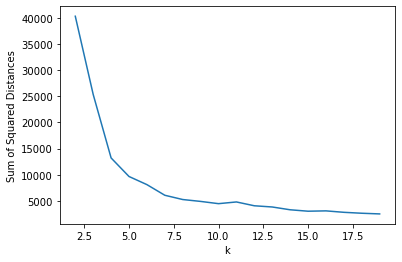

In [23]:
plt.plot(range(2,20), ssd)
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')

# seems like 5 clusters are appropriate

In [24]:
del coordinates_df['cluster']

In [25]:
range_n_clusters = range(2, 20)

X = np.array(coordinates_df)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5035575871556137
For n_clusters = 3 The average silhouette_score is : 0.52595826819953
For n_clusters = 4 The average silhouette_score is : 0.5800715059790145
For n_clusters = 5 The average silhouette_score is : 0.6144091482133723
For n_clusters = 6 The average silhouette_score is : 0.6158093308978937
For n_clusters = 7 The average silhouette_score is : 0.5994224679231596
For n_clusters = 8 The average silhouette_score is : 0.5953419625524307
For n_clusters = 9 The average silhouette_score is : 0.6062270238636666
For n_clusters = 10 The average silhouette_score is : 0.6036279301184655
For n_clusters = 11 The average silhouette_score is : 0.5943092961685204
For n_clusters = 12 The average silhouette_score is : 0.5955142779207764
For n_clusters = 13 The average silhouette_score is : 0.5538285643358677
For n_clusters = 14 The average silhouette_score is : 0.6029401375097045
For n_clusters = 15 The average silhouette_score is : 0.56552

In [26]:
# I used n_clusters = 11 with the old data
clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_

In [27]:
gdf['Cluster Label'] = cluster_labels

In [28]:
centers_gdf = gpd.GeoDataFrame(centers, geometry=[Point(point) for point in centers])

In [ ]:
!pip install seaborn

In [29]:
import seaborn as sns
palette = sns.color_palette(None, 11).as_hex()

In [30]:
colors = palette

traces = []

for cluster_num in set(cluster_labels):
    
    sub_df = gdf[gdf['Cluster Label'] == cluster_num]
    
    trace = go.Scattermapbox(
    lon = sub_df['geometry'].x.values,
    lat = sub_df['geometry'].y.values,
    mode = 'markers',
    marker = go.scattermapbox.Marker(
    size = 5,
    color= colors[cluster_num],
    #symbol = 'star'
    ),
    text = sub_df['Place Name'] + "<br>" +
        "Cluster ID: " + str(cluster_num)
    )
    
    traces.append(trace)
    
cluster_center_trace = go.Scattermapbox(
    lon = centers_gdf['geometry'].x.values,
    lat = centers_gdf['geometry'].y.values,
    mode = 'markers',
    marker = go.scattermapbox.Marker(
    size = 7,
    color='red',
    #symbol = 'star'
    ),
    text = list(range(7))
    )

traces.append(cluster_center_trace)
    
fig = go.Figure(data = traces)

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    width = 800, 
    height = 800,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=51,
            lon=10
        ),
        pitch=0,
        zoom=5
    ),
)

fig.layout.update(layout)
                  
iplot(fig, filename="geomap_twitter_cluster")

In [ ]:
# germany_borders = gpd.read_file("Bundeslaender_2016_ew.shp")
# You can find it here: https://opendata-esri-de.opendata.arcgis.com/datasets/b8d0cc7735774bed8e6df1c5410394a4_0?geometry=-31.360%2C46.270%2C52.268%2C55.886

In [37]:
germany_borders = gpd.read_file("https://opendata.arcgis.com/datasets/b8d0cc7735774bed8e6df1c5410394a4_0.geojson")
germany_borders.crs = "epsg=4326"

In [32]:
# Cannot have multiple geometry-like columns!
del gdf['Bounding Box']
del gdf['Tweet Coordinates']

In [38]:
germany_borders.loc[[0], 'geometry'].values

<GeometryArray>
Length: 1, dtype: geometry

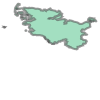

In [39]:
germany_borders.loc[[0], 'geometry'].values[0]

In [41]:
# https://stackoverflow.com/questions/64200595/geopandas-overlay-intersection-returns-zero-rows THANK YOU!

# Multiple solutions: https://gis.stackexchange.com/questions/208546/check-if-a-point-falls-within-a-multipolygon-with-python

from geopandas.tools import overlay

gdf_list = []

for state_num in range(len(germany_borders)):
    
    # optional: check first if gdf.crs == sub_gdf.crs
    
    sub_gdf = gpd.GeoDataFrame(germany_borders.loc[state_num]).T
    #sub_gdf['geometry'] = germany_borders.loc[state_num]['geometry']
    sub_gdf['geometry'] = germany_borders.loc[[state_num], 'geometry'].values[0]
    
    # sub_gdf = sub_gdf.set_crs(epsg = 4326)
    sub_gdf.crs = "epsg=4326"
    
    intersected_points = overlay(gdf, sub_gdf, how="intersection")
    
    gdf_list.append(intersected_points)
    
    print("Current state: " + str(intersected_points['GEN'].unique()[0]) + ", Tweets sent: " + str(len(intersected_points)))

ValueError: Length of values (25) does not match length of index (1)

In [34]:
len(gdf)

9951

In [35]:
merged_df = pd.concat(gdf_list)

In [36]:
tweets_count = merged_df.groupby('GEN').count()['Tweet ID'].sort_values(ascending=False)

In [37]:
tweets_count = pd.DataFrame(tweets_count)

In [38]:
states = ['Nordrhein-Westfalen', 'Berlin', 'Niedersachsen', 'Baden-Württemberg', 
          'Bayern', 'Hessen', 'Sachsen', 'Rheinland-Pfalz', 'Brandenburg',
         'Schleswig-Holstein', 'Mecklenburg-Vorpommern', 'Sachsen-Anhalt', 
          'Thüringen', 'Bremen', 'Saarland', 'Hamburg']

pop_data = [17947221, 3669491, 7993608, 11100394, 13124737, 6288080, 4071971, 
            4093903, 2521893, 2903773, 1608138, 2194782, 2133378, 681202, 986887, 1847253]

d = {'State': states, 'Pop': pop_data}
pop_df = pd.DataFrame(d)
pop_df = pop_df.set_index('State')

In [39]:
merged_pop_df = tweets_count.merge(pop_df, left_index=True, right_index=True)
merged_pop_df.head()

,Tweet ID,Pop
Nordrhein-Westfalen,2130,17947221
Berlin,1690,3669491
Niedersachsen,1205,7993608
Baden-Württemberg,1066,11100394
Bayern,854,13124737


In [40]:
from scipy import stats

X = np.log(merged_pop_df['Pop'])
y= np.log(merged_pop_df['Tweet ID'])

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope, intercept, r_value, p_value, std_err)

1.076941506842333 -10.382026286432428 0.7547663624851767 0.0007264311473642486 0.25015848110294897


In [42]:
line = slope*X+intercept

trace_data = go.Scatter(
    x = X,
    y = y,
    mode = 'markers',
    marker = dict(symbol='circle'),
    text = list(merged_pop_df.index)
    # name='Equities',
    # hovertext=reshaped_df.iloc[:16,2].values
)

trace_line = go.Scatter(
                  x=X,
                  y=line,
                  mode='lines',
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=13.5,
                  y=8,
                  text='$R^2 =' + str(round(r_value**2, 4)) + ', Y =' + str(round(slope, 4)) + 'X + ' + str(round(intercept,4)) + '$',
                  showarrow=False,
                  font=go.Font(size=12)
                  )

layout = go.Layout(
    title=go.layout.Title(
        text='Tweets and Population (state level)',
        xref='paper',
        x=0
    ),
    plot_bgcolor='rgb(229, 229, 229)',
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Log Population',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Log Tweets sent',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    annotations=[annotation]
)

data = [trace_data, trace_line]

fig = go.Figure(data=data, layout=layout)


iplot(fig, filename = 'tweets_pop')

How can the clusters and memberships you assigned before be meaningfully interpreted? How many Tweets (as percentage of all per state) were classified into the cluster with `cluster id = 8`? From which state does those cluster members most likely originate from? Confirm your assertion by looking at the map you created above.

In [43]:
grouped_df = pd.DataFrame(merged_df.groupby(['GEN','Cluster Label']).count()['Tweet ID'])
grouped_df = grouped_df.stack().to_frame().reset_index()
grouped_df['Cluster Label'] = grouped_df['Cluster Label'].astype(str)
grouped_df.columns = ['State', 'Cluster Label', 'Col Name', 'Count']
grouped_df.head()

,State,Cluster Label,Col Name,Count
0,Baden-Württemberg,0,Tweet ID,6
1,Baden-Württemberg,3,Tweet ID,140
2,Baden-Württemberg,8,Tweet ID,920
3,Bayern,0,Tweet ID,187
4,Bayern,3,Tweet ID,33


In [44]:
pd.crosstab(grouped_df['State'], grouped_df['Cluster Label'], values = grouped_df['Count'], aggfunc=np.sum, normalize='columns')

Cluster Label,0,1,10,2,3,4,5,6,7,8,9
State,,,,,,,,,,,
Baden-Württemberg,0.028037,0.000000,0.000000,0.000000,0.115226,0.000000,0.000000,0.000000,0.0,0.982906,0.000000
Bayern,0.873832,0.000000,0.000000,0.000000,0.027160,0.000000,0.000000,0.013559,1.0,0.017094,0.000000
Berlin,0.000000,0.752449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Brandenburg,0.000000,0.150045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.039039
Bremen,0.000000,0.000000,0.293151,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Hamburg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012528,0.000000,0.0,0.000000,0.000000
Hessen,0.009346,0.000000,0.000000,0.101852,0.547325,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Mecklenburg-Vorpommern,0.000000,0.028940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.522523
Niedersachsen,0.000000,0.000000,0.671233,0.501852,0.000000,0.000000,0.675399,0.001695,0.0,0.000000,0.285285


In [46]:
gdf['Created at'] = gdf['Created at'].astype(str)
gdf.to_file("Tweet_Analysis.shp")

<ipython-input-46-5e67ff5e92e8>:2: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

